In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from src.tennis_script import *

plt.style.use('ggplot')

In [12]:
serve_data = pd.read_csv('data/serve_times.txt')

In [13]:
serve_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     120 non-null    object
 1   seconds_before_next_point  120 non-null    int64 
 2   day                        120 non-null    object
 3   opponent                   120 non-null    object
 4   game_score                 120 non-null    object
 5   set                        120 non-null    int64 
 6   game                       120 non-null    object
dtypes: int64(2), object(5)
memory usage: 6.7+ KB


In [14]:
serve_data.head(5)

,server,seconds_before_next_point,day,opponent,game_score,set,game
0,Nicolas Almagro,22,28-May-15,Rafael Nadal,15-30,1,0-0
1,Nicolas Almagro,19,28-May-15,Rafael Nadal,15-40,1,0-0
2,Nicolas Almagro,23,28-May-15,Rafael Nadal,30-40,1,0-0
3,Nicolas Almagro,24,28-May-15,Rafael Nadal,Deuce,1,0-0
4,Nicolas Almagro,19,28-May-15,Rafael Nadal,Ad-in,1,0-0


In [20]:
serve_data = serve_data[['server','seconds_before_next_point','game_score', 'set', 'game']]

serve_data.head(5)

,server,seconds_before_next_point,game_score,set,game
0,Nicolas Almagro,22,15-30,1,0-0
1,Nicolas Almagro,19,15-40,1,0-0
2,Nicolas Almagro,23,30-40,1,0-0
3,Nicolas Almagro,24,Deuce,1,0-0
4,Nicolas Almagro,19,Ad-in,1,0-0


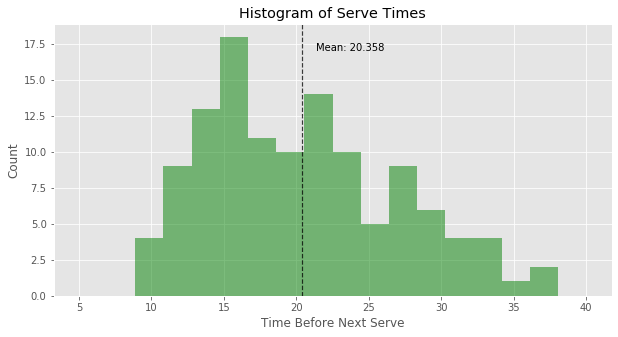

In [162]:
#Distribution of Serve Times
serve_time_mean = np.mean(serve_data['seconds_before_next_point'])
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(serve_data['seconds_before_next_point'], bins = 18, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(serve_time_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(serve_time_mean * 1.05, ymax * .9, f'Mean: {round(serve_time_mean,3)}')
ax.set_title('Histogram of Serve Times')
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve")
plt.savefig('images/hist_of_serve_times');

In [111]:
#create boolean indexes for high-pressure and not high-pressure points
bool_index_40 = serve_data['game_score'].str.contains('40')
bool_index_ad = serve_data['game_score'].str.contains('Ad')

not_bool_index_40 = pd.Series([not opp for opp in bool_index_40])
not_bool_index_ad = pd.Series([not opp for opp in bool_index_ad])

In [112]:
#DataFrame consisting of only high pressure points
hp_data = serve_data[bool_index_40 | bool_index_ad]

In [113]:
hp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57 entries, 1 to 119
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     57 non-null     object
 1   seconds_before_next_point  57 non-null     int64 
 2   day                        57 non-null     object
 3   opponent                   57 non-null     object
 4   game_score                 57 non-null     object
 5   set                        57 non-null     int64 
 6   game                       57 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.6+ KB


In [114]:
#DataFrame consisting of only not high-pressure points
not_hp_data = serve_data[not_bool_index_40 & not_bool_index_ad]
not_hp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 0 to 118
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     63 non-null     object
 1   seconds_before_next_point  63 non-null     int64 
 2   day                        63 non-null     object
 3   opponent                   63 non-null     object
 4   game_score                 63 non-null     object
 5   set                        63 non-null     int64 
 6   game                       63 non-null     object
dtypes: int64(2), object(5)
memory usage: 3.9+ KB


In [115]:
#avg time between all points
serve_time_mean

20.358333333333334

In [116]:
#avg time before high-pressure point
hp_time_mean = np.mean(hp_data['seconds_before_next_point'])
hp_time_ste = stats.sem(hp_data['seconds_before_next_point'])

hp_time_mean, hp_time_ste

(21.263157894736842, 0.9065088765293405)

In [117]:
#avg time before not high-pressure point
not_hp_time_mean = np.mean(not_hp_data['seconds_before_next_point'])
not_hp_time_ste = stats.sem(not_hp_data['seconds_before_next_point'])
not_hp_time_mean, not_hp_time_ste

(19.53968253968254, 0.8669340828204047)

NameError: name 'hp_data' is not defined

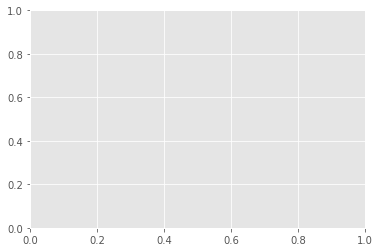

In [21]:
fig, ax = plt.subplots()
ax.hist(hp_data['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'r', alpha = .5)
ax.axvline(hp_time_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(hp_time_mean * 1.05, ymax * .9, f'Mean: {round(hp_time_mean,3)}')
ax.set_title("Histogram of Serve Times (High Pressure)")
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

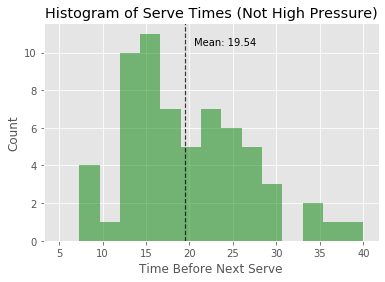

In [119]:
fig, ax = plt.subplots()
ax.hist(not_hp_data['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(not_hp_time_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(not_hp_time_mean * 1.05, ymax * .9, f'Mean: {round(not_hp_time_mean,3)}')
ax.set_title("Histogram of Serve Times (Not High Pressure)")
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

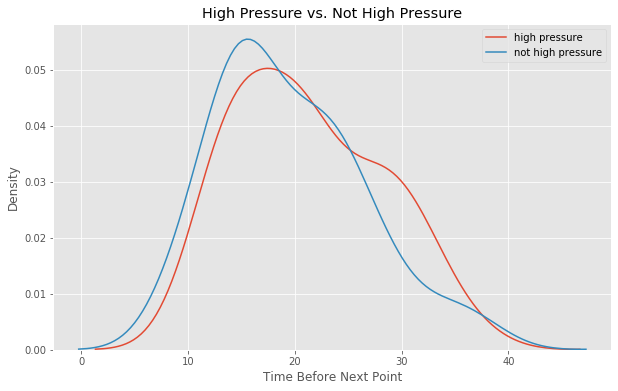

In [158]:
#Comparing Density Curves of High and Not High Pressure Points
plt.figure(figsize = (10,6))
sns.distplot(hp_data['seconds_before_next_point'], hist = False, label = 'high pressure')
sns.distplot(not_hp_data['seconds_before_next_point'], hist = False, label = 'not high pressure')
plt.title('High Pressure vs. Not High Pressure')
plt.ylabel('Density')
plt.xlabel('Time Before Next Point')
plt.savefig('images/density_comparison.png')

In [121]:
#Find avg time before serve for grouped by score
time_per_score = serve_data[['seconds_before_next_point','game_score']].groupby('game_score').aggregate(np.mean)
score_index = ['0-15', '0-30', '15-0', '15-15', '15-30', '30-0',
       '30-15', '30-30', 'Deuce', '40-0', '40-15', '40-30', 'Ad-in','30-40','15-40','0-40', 'Ad-out'
       ]

score_counts = [sum(serve_data['game_score'] == score) for score in score_index]
score_counts_norm = [float(i)/max(score_counts) for i in score_counts]

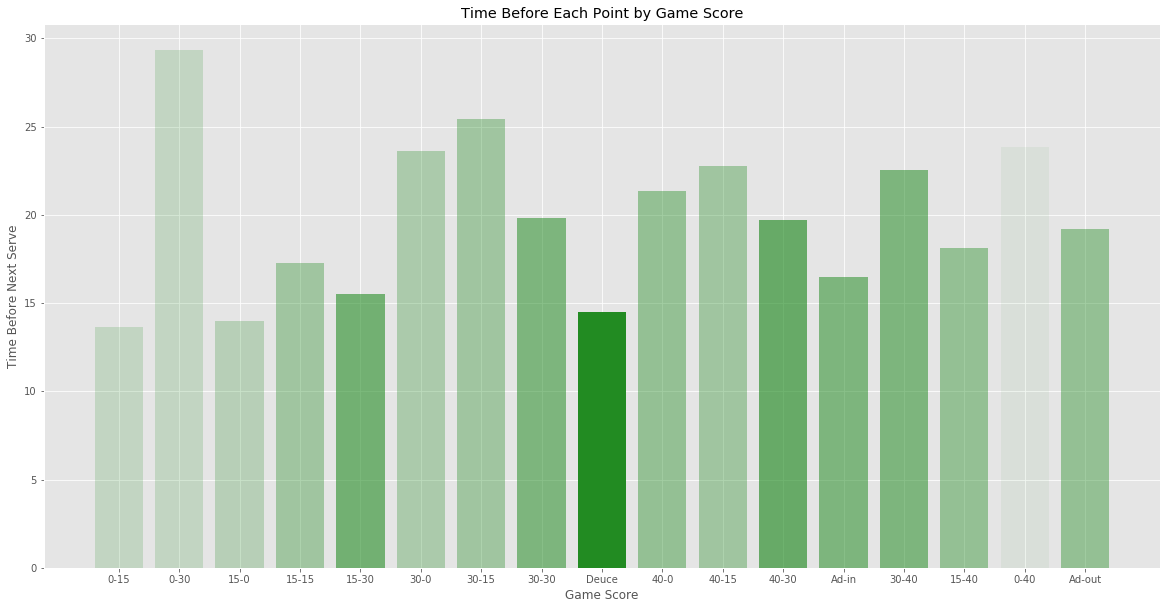

In [144]:
#bar graph of avg time between points for each game score, shaded by number of times per point
fig, ax = plt.subplots(figsize = (20, 10))
for i in range(len(score_index)):
    ax.bar(score_index[i], time_per_score['seconds_before_next_point'][i], alpha = score_counts_norm[i], color = 'forestgreen')
ax.set_xlabel('Game Score')
ax.set_ylabel('Time Before Next Serve')
ax.set_title('Time Before Each Point by Game Score')
plt.savefig('images/score_comparison');

In [123]:
#split high-pressure points by about to win or about to lose
about_to_lose_idx = ['30-40', '15-40','0-40', 'Ad-out']
about_to_win_idx = ['40-0', '40-15', '40-30', 'Ad-in']

bool_about_to_lose = pd.Series([True if item in about_to_lose_idx else False for item in serve_data['game_score']])
bool_about_to_win = pd.Series([True if item in about_to_win_idx else False for item in serve_data['game_score']])

about_to_lose_df = serve_data[bool_about_to_lose]
about_to_win_df = serve_data[bool_about_to_win]

about_to_lose_df.info()
about_to_win_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1 to 119
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     24 non-null     object
 1   seconds_before_next_point  24 non-null     int64 
 2   day                        24 non-null     object
 3   opponent                   24 non-null     object
 4   game_score                 24 non-null     object
 5   set                        24 non-null     int64 
 6   game                       24 non-null     object
dtypes: int64(2), object(5)
memory usage: 1.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 4 to 117
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   server                     33 non-null     object
 1   seconds_before_next_point  33 non-null     int64 
 2   day                     

In [124]:
#avg time before next point if server is about to lose game
about_to_lose_mean = np.mean(about_to_lose_df['seconds_before_next_point'])

In [125]:
#avg time before next point if server is about to win
about_to_win_mean = np.mean(about_to_win_df['seconds_before_next_point'])

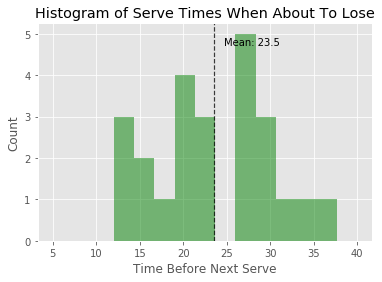

In [126]:
fig, ax = plt.subplots()
ax.hist(about_to_lose_df['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(about_to_lose_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(about_to_lose_mean * 1.05, ymax * .9, f'Mean: {round(about_to_lose_mean,3)}')
ax.set_title('Histogram of Serve Times When About To Lose')
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

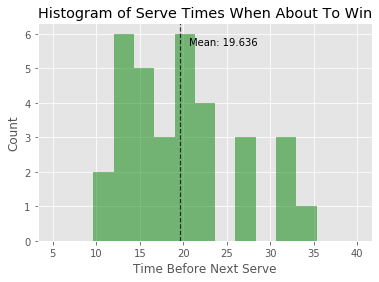

In [127]:
fig, ax = plt.subplots()
ax.hist(about_to_win_df['seconds_before_next_point'], bins = 15, range = (5, 40), color = 'g', alpha = .5)
ax.axvline(about_to_win_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ymin, ymax = ax.get_ylim()
ax.text(about_to_win_mean * 1.05, ymax * .9, f'Mean: {round(about_to_win_mean,3)}')
ax.set_title('Histogram of Serve Times When About To Win')
ax.set_ylabel("Count")
ax.set_xlabel("Time Before Next Serve");

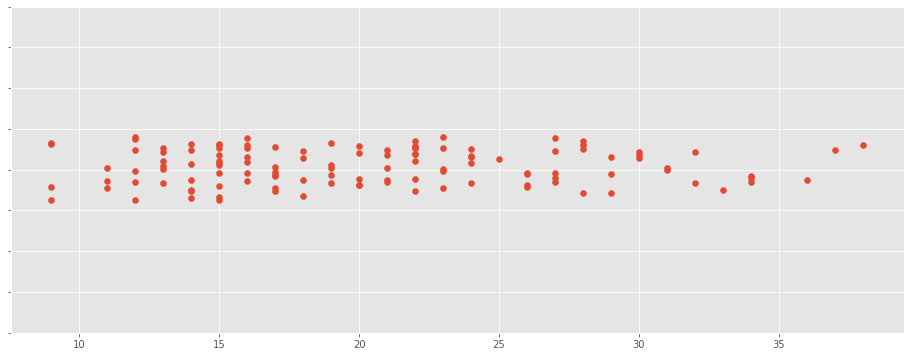

In [128]:
fig, axs = plt.subplots(figsize = (16,6), sharex = True)

one_dim_scatterplot(serve_data['seconds_before_next_point'], axs)

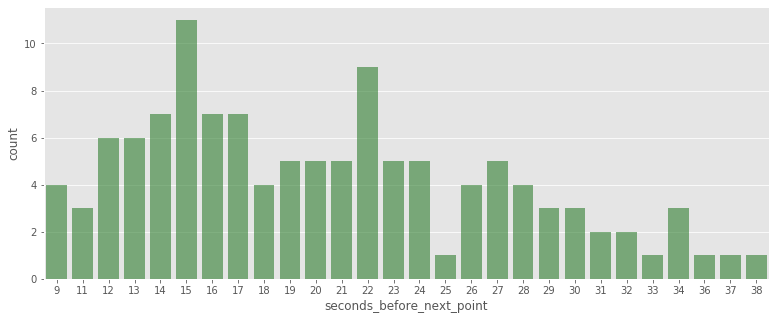

In [169]:
#Poisson Distribution

dist = stats.poisson(mu = serve_time_mean)

plt.figure(figsize = (13,5))
sns.countplot(serve_data['seconds_before_next_point'], color = 'forestgreen', alpha = 0.6)
skew_ = stats.skew(serve_data['seconds_before_next_point'])

Null Hypothesis: There is difference between time before serve high pressure points and low pressure points (mean = 19.5)

Alternative Hypothesis: The time before serve is greater for high pressure points than low pressure points (mean > 19.5)

In [130]:
a, loc, scale = stats.skewnorm.fit(serve_data['seconds_before_next_point'])
loc_hp, scale_hp = stats.norm.fit(hp_data['seconds_before_next_point'])
a_nhp, loc_nhp, scale_nhp = stats.skewnorm.fit(not_hp_data['seconds_before_next_point'])

hp_dist = stats.norm(loc_hp, scale_hp)
not_hp_dist = stats.skewnorm(a_nhp, loc_nhp, scale_nhp)
loc_hp, scale_hp

(21.263157894736842, 6.783691268084308)

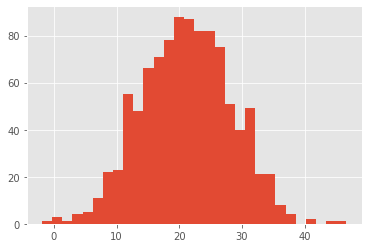

In [131]:
skew_dist = stats.skewnorm(a, loc, scale)

plt.hist(hp_dist.rvs(1000), bins = 30);

In [132]:
not_hp_means = get_sample_means(not_hp_dist, 50, 1000)


In [133]:
mean_not_hp_means = np.mean(not_hp_means)
var_not_hp_means = np.var(not_hp_means)
dist_not_hp_means_skew = stats.norm(mean_not_hp_means, np.sqrt(var_not_hp_means))
mean_not_hp_means, np.sqrt(var_not_hp_means)
dist_not_hp_means = stats.norm(not_hp_time_mean, not_hp_time_ste)
dist_hp_means = stats.norm(hp_time_mean, hp_time_ste)


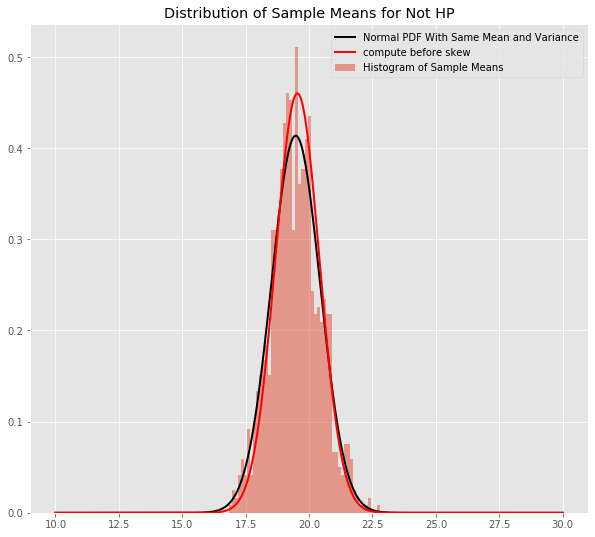

In [134]:
fig, ax = plt.subplots(figsize = (10,9))
ax.hist(not_hp_means, bins = 50,density = True, label = 'Histogram of Sample Means', alpha = 0.5)
ax.set_title('Distribution of Sample Means for Not HP')
x = np.linspace(10, 30, num=500)
ax.plot(x, dist_not_hp_means_skew.pdf(x), linewidth=2, color="black", 
        label="Normal PDF With Same Mean and Variance")
ax.plot(x, dist_not_hp_means.pdf(x), linewidth = 2, color = 'r', label = "compute before skew")
ax.legend(loc = 'best')

In [135]:
p_val = 1-dist_not_hp_means.cdf(hp_time_mean)
p_val

0.023405181719318935

In [136]:
p_val_about_to_lose = 1 - dist_not_hp_means.cdf(about_to_lose_mean)
p_val_about_to_lose


2.4597990189167973e-06

In [137]:
p_val_about_to_win = 1 - dist_not_hp_means.cdf(about_to_win_mean)
p_val_about_to_win

0.45560172546205957

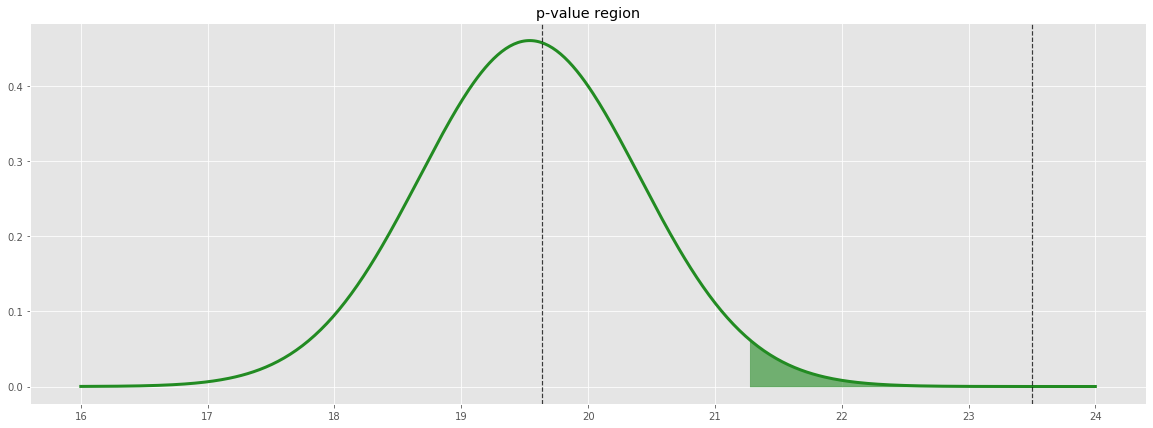

In [168]:
fig, ax = plt.subplots(figsize = (20,7))
x = np.linspace(16, 24, num=500)
ax.plot(x, dist_not_hp_means.pdf(x), linewidth = 3, color = 'forestgreen', label = "Not High Pressure")
ax.fill_between(x, dist_not_hp_means.pdf(x), where=(x >= hp_time_mean),
                color="forestgreen", alpha=0.6)
ax.set_title('p-value region')
ax.axvline(about_to_lose_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
ax.axvline(about_to_win_mean, color = 'k', linestyle = 'dashed', alpha = .75, linewidth = 1.2)
plt.savefig('images/p_val_region')